In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread('/mnt/d/dailywork/03.ascites/image_optimize/CC_0002_0017_20241122154853.tiff', cv2.IMREAD_COLOR)

In [3]:
image.shape

(2024, 2432, 3)

In [4]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [5]:
gray_image.shape

(2024, 2432)

# 1. pre-processing

## 1.1 guassian blur

In [6]:
# 应用高斯模糊
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)  # (5, 5) 是高斯核的大小

# 显示原图和去噪后的图像
cv2.imshow("Original Image", gray_image)
cv2.imshow("Gaussian Blurred Image", blurred_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

: 

In [8]:
# 应用Sobel滤波器进行边缘检测
# SobelX 和 SobelY分别检测水平和垂直方向的边缘
sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)  # 水平边缘
sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)  # 垂直边缘

In [9]:
# 计算梯度幅值（边缘强度）
magnitude = cv2.magnitude(sobel_x, sobel_y)

In [10]:
# 将结果转换为8位无符号整型图像，便于显示
magnitude = np.uint8(np.absolute(magnitude))

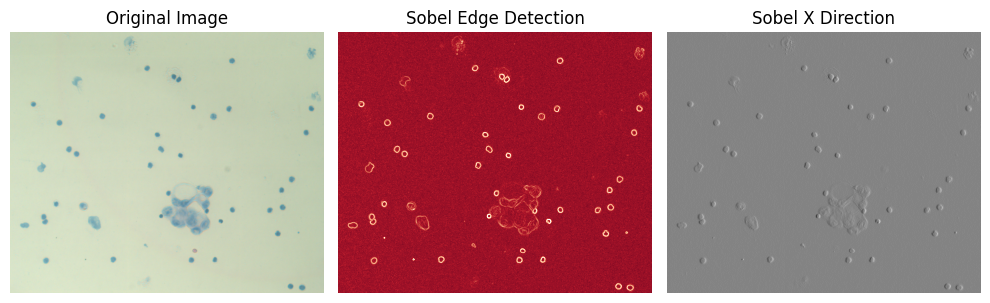

In [19]:
# 显示结果
plt.figure(figsize=(10, 6))

# 显示原始图像
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

# 显示Sobel边缘检测结果
plt.subplot(1, 3, 2)
plt.imshow(magnitude, cmap='RdGy')
plt.title("Sobel Edge Detection")
plt.axis('off')

# 显示Sobel X方向边缘
plt.subplot(1, 3, 3)
plt.imshow(sobel_x, cmap='gray')
plt.title("Sobel X Direction")
plt.axis('off')

plt.tight_layout()
plt.show()